<h1> Lecture 29

Data Science 8, Summer 2021 </h1>

<h3>
<b>
<ul>
    <li>Regression Inference</li>
</ul>
</b>
</h3>

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

#The following allows porting images into a Markdown window
#Syntax: ![title](image_name.png)
from IPython.display import Image

In [2]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

In [3]:
def plot_fitted(t, x, y):
    tbl = t.select(x, y)
    tbl.with_columns('Fitted Value', fitted_values(t, x, y)).scatter(0)

In [4]:
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Fitted', fitted_values(t, x, y),
        'Residual', residuals(t, x, y)
    )
    tbl.select(x, y, 'Fitted').scatter(0)
    tbl.scatter(x, 'Residual')

## Regression Model ##

In [5]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    #The following line plots the true line in green
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    #The following line plots the true line in green
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

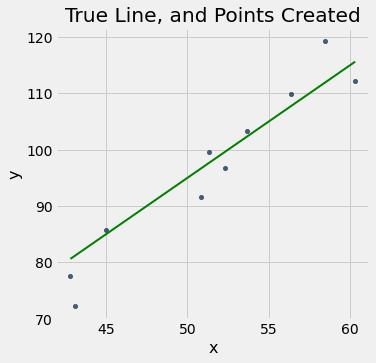

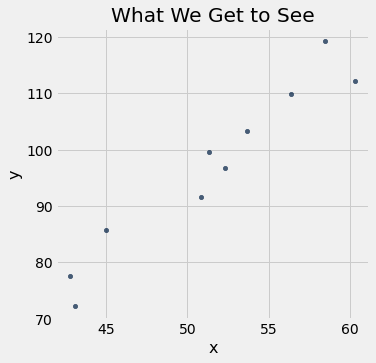

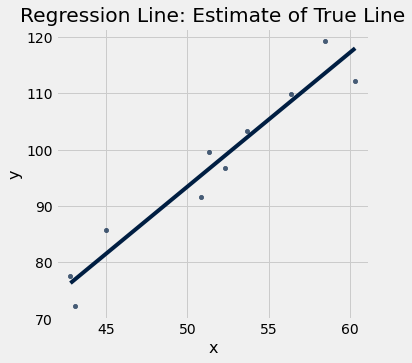

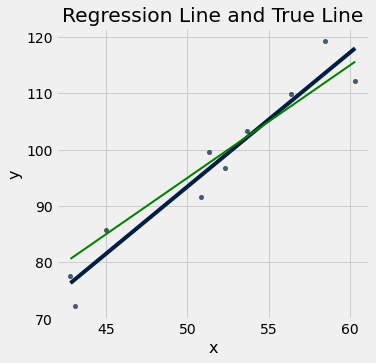

In [6]:
draw_and_compare(2, -5, 10)
#Green is the true line

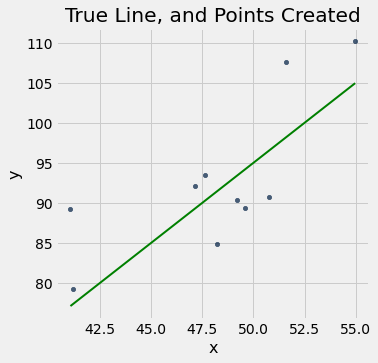

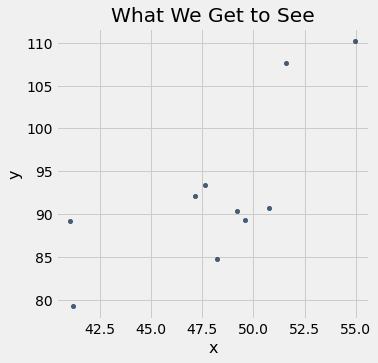

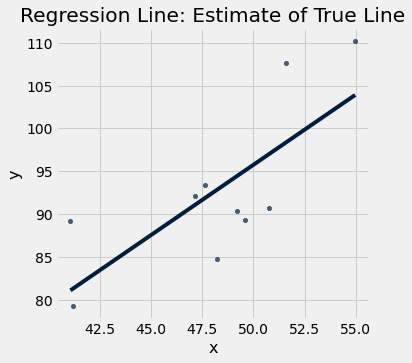

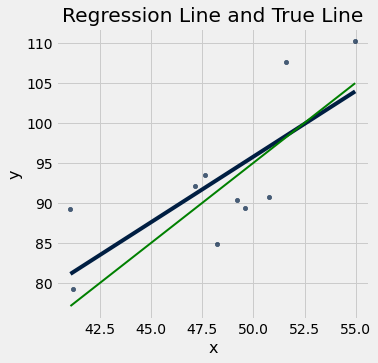

In [7]:
draw_and_compare(2, -5, 10)

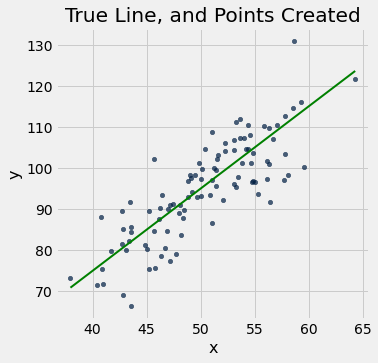

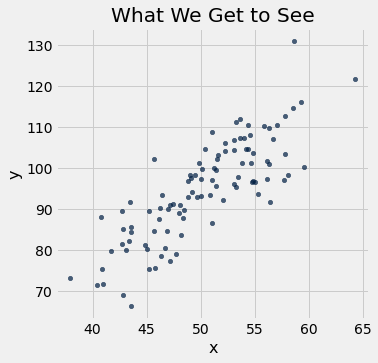

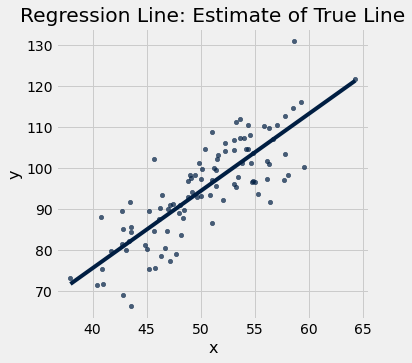

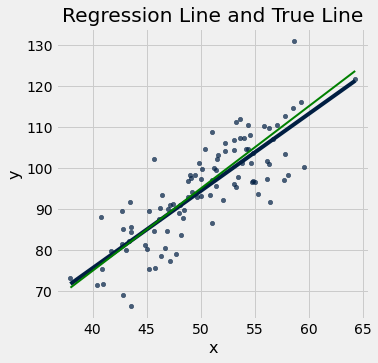

In [8]:
draw_and_compare(2, -5, 100)

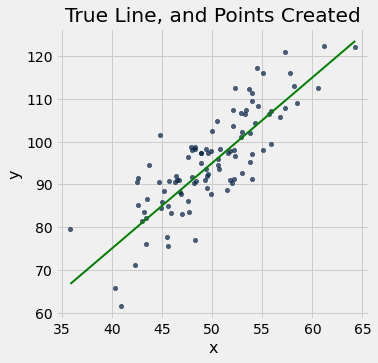

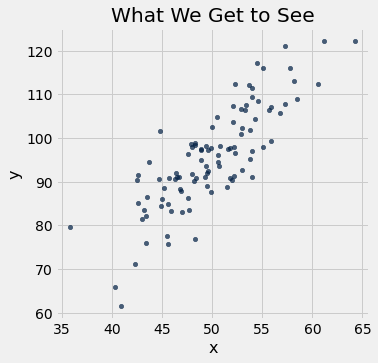

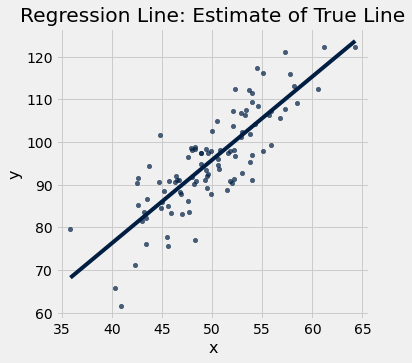

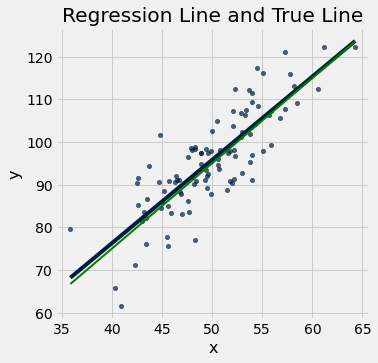

In [9]:
draw_and_compare(2, -5, 100)

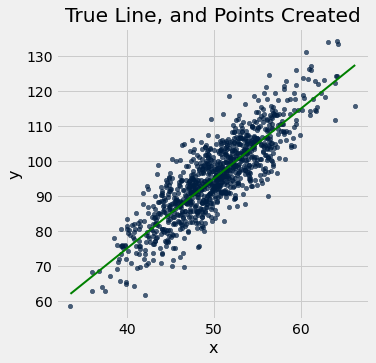

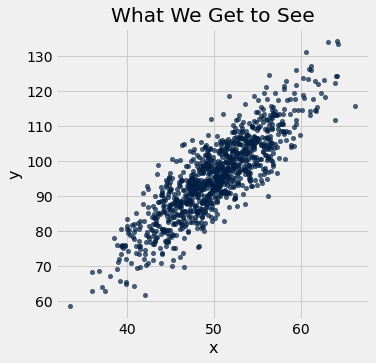

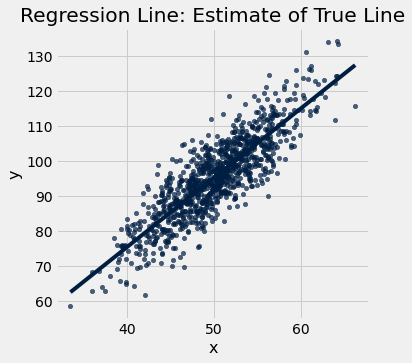

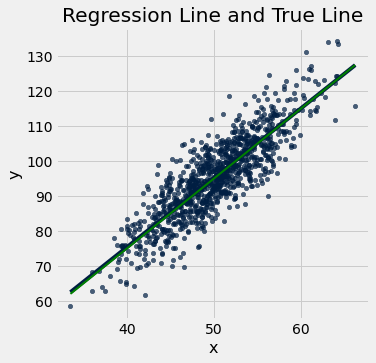

In [10]:
draw_and_compare(2, -5, 1000)

In [11]:
## Questions?
## Slides

SLIDE: Inference for slope

## Inference for the Slope ##

In [12]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


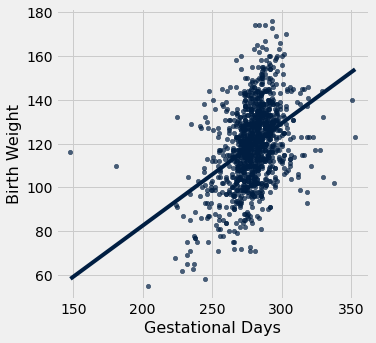

In [13]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

<h4>Regression Line Slope:</h4>

In [14]:
slope(births, 'Gestational Days', 'Birth Weight')

0.4665568769492152

<h4>Bootstrap 5,000 times:</h4>

In [15]:
def bootstrap_slope(t, x, y, repetitions=5000):
    """ 
    Makes a 95% confidence interval for the slope of the prediction line
    for y, using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', np.round(observed_slope,2))
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(np.round(left,2), 'to', np.round(right,2))

Slope of regression line: 0.47
Approximate 95%-confidence interval for the slope of the true line:
0.38 to 0.56


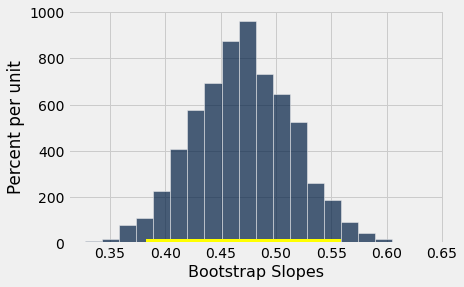

In [16]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight', 2500)

In [17]:
## Questions?
## Slides

## Rain on the Regression Parade

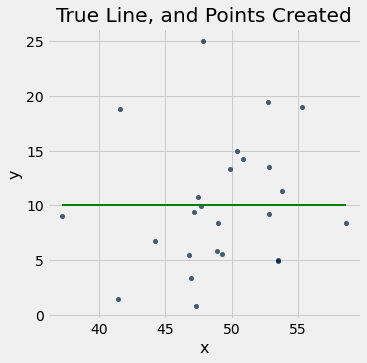

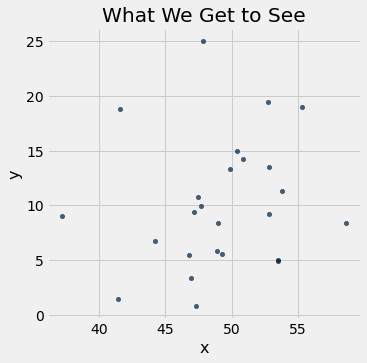

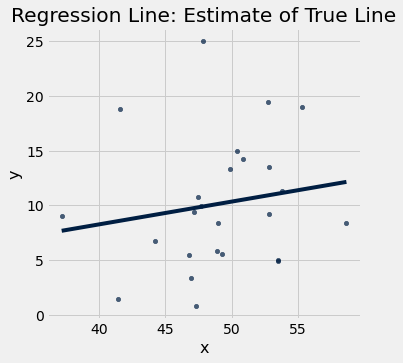

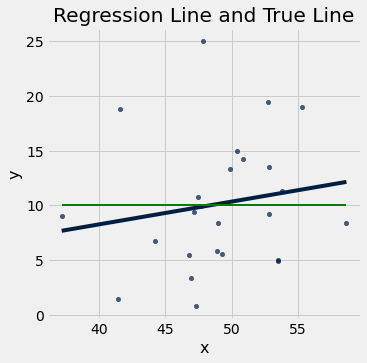

In [18]:
draw_and_compare(0, 10, 25)

**Null Hypothesis.** Slope of true line = 0.

**Alternative Hypothesis.** Slope of true line is not 0.

In [19]:
slope(births, 'Maternal Age', 'Birth Weight')

0.08500766941582513

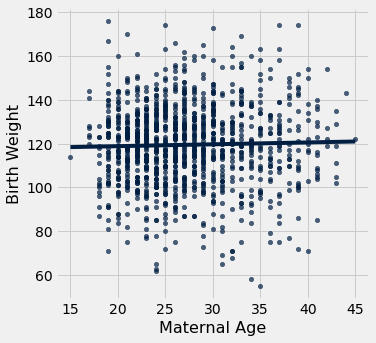

In [20]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

Slope of regression line: 0.09
Approximate 95%-confidence interval for the slope of the true line:
-0.1 to 0.27


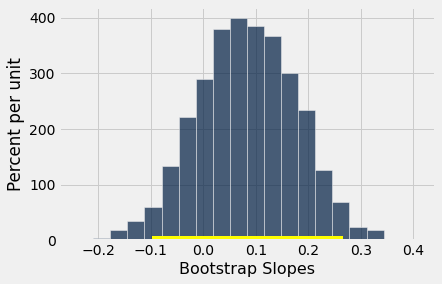

In [21]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight', 2500)

In [22]:
## Questions?
## Slides

## Prediction ##

<h4>CDC Cutoffs/Definitions:<br>
    
Preterm Birth (baby born before 37 weeks of gestation)<br><br>
    
Postterm Birth (pregnancy extends to 42 weeks of gestation or more) </h4>

In [23]:
births = Table.read_table('baby.csv')

In [24]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [25]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
# Expressed in gestational days
37 * 7, 42 * 7

(259, 294)

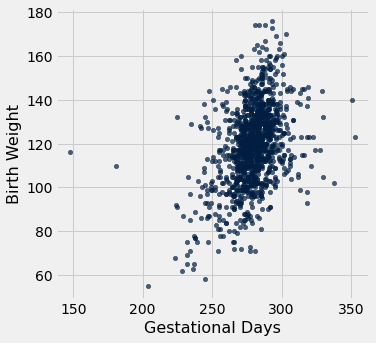

In [26]:
births.scatter('Gestational Days', 'Birth Weight')

<h4>Discard the outliers.<br>
    
Keep only data where gestational days are between 225 and 325.</h4>

In [27]:
births = births.where('Gestational Days', are.between(225, 325))

<h5>The following new scatter plot appears more zoomed-in, because we've discarded the outliers.</h5>

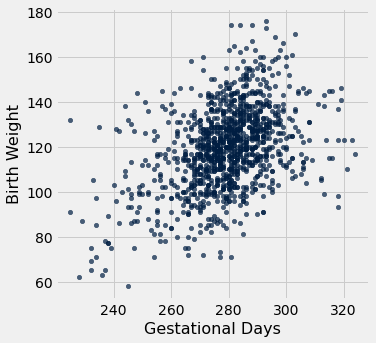

In [28]:
births.scatter('Gestational Days', 'Birth Weight')

<h4>Now fit a regression line through the scatter plot.</h4>

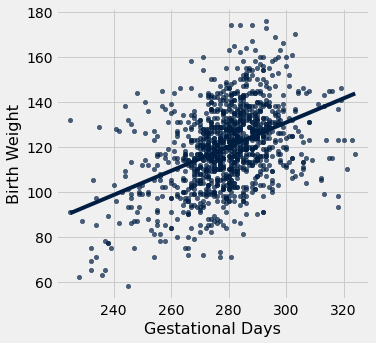

In [29]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

<h5>Determine the correlation coefficient between Gestational Days and Birth Weight:</h5>

In [30]:
correlation(births, 'Gestational Days', 'Birth Weight')

0.4229511845242399

In [31]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [32]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.8095167424877

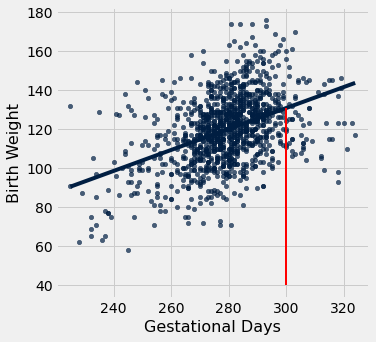

In [33]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

<h4>Now we look at the variability of the prediction.<br>
    
Each time we take a random sample, we obtain a different regression line and, therefore, a different prediction.</h5>

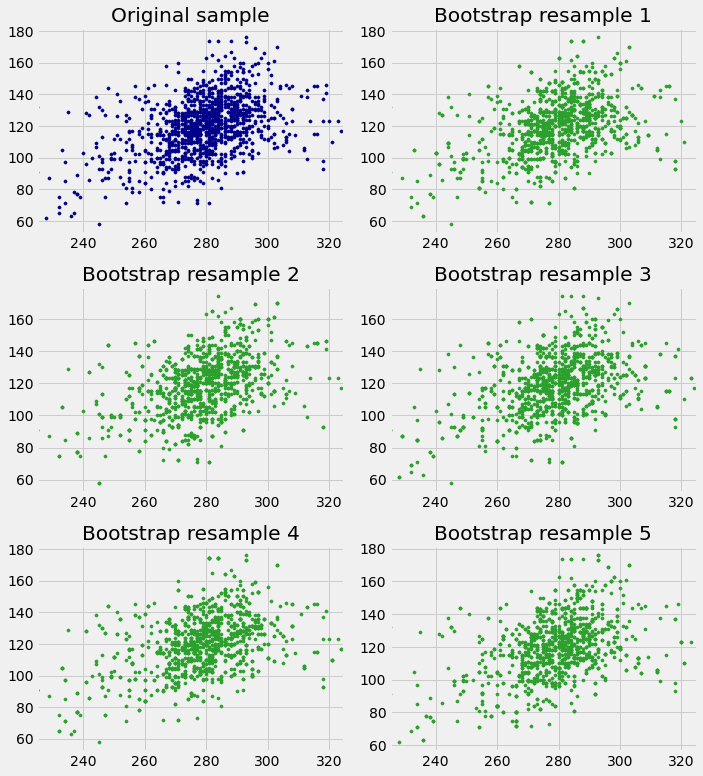

In [34]:
# You don't need to understand the plotting code in this cell,
# but you should understand the figure that comes out.

plots.figure(figsize=(10, 11))
plots.subplot(3, 2, 1)
plots.scatter(births[1], births[0], s=10, color='darkblue')
plots.xlim([225, 325])
plots.title('Original sample')

#The following lines create 5 bootstrap samples of the Original Sample
for i in np.arange(1, 6, 1):
    plots.subplot(3,2,i+1)
    resampled = births.sample() #.sample() without argument defaults to full-size sample w/ replacement
    plots.scatter(resampled.column('Gestational Days'), resampled.column('Birth Weight'), s=10, color='tab:green')
    plots.xlim([225, 325])
    plots.title('Bootstrap resample '+str(i))
plots.tight_layout()

Predicted y from bootstramp resample was 130.52123340107036
Predicted y from bootstramp resample was 130.59210306627813
Predicted y from bootstramp resample was 131.78132208621872
Predicted y from bootstramp resample was 131.29952192637273


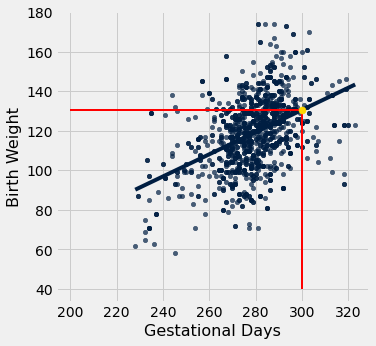

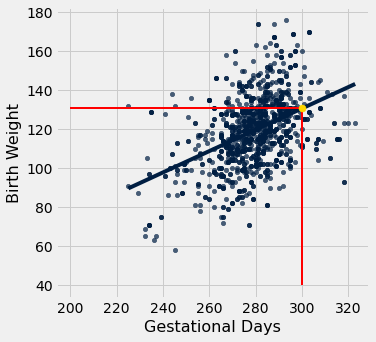

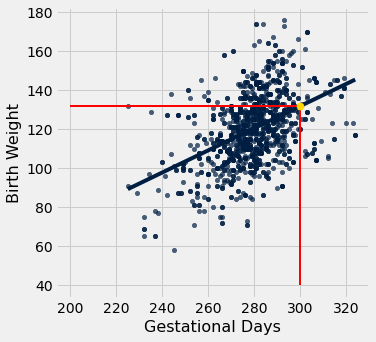

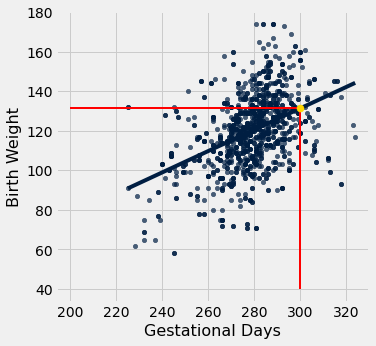

In [35]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstramp resample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='red', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);

<h4>Now resample 10 times, and plot the regression lines.<br>

Take ten different bootstraps.<br>

Determine the regression line for each bootstrap resample.<br>

Plot the regression lines on one chart for comparison.<br>

The dots are the predictions for the bootstraps.</h4>

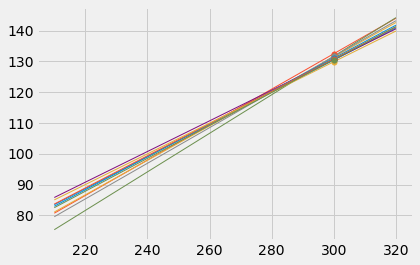

In [36]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

<h4>Tabular values of the ten resamples.  Notice the predictions don't change that much (the "at 300" column):</h4>

In [37]:
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
lines


slope,intercept,at 291,at 300,at 309
0.542856,-31.5647,126.407,131.292,136.178
0.486059,-16.643,124.8,129.175,133.549
0.530982,-28.5166,125.999,130.778,135.557
0.630942,-55.9492,127.655,133.334,139.012
0.615222,-52.1283,126.901,132.438,137.975
0.585432,-43.2911,127.07,132.338,137.607
0.495819,-18.8323,125.451,129.913,134.376
0.490173,-17.8315,124.809,129.22,133.632
0.533174,-29.0277,126.126,130.925,135.723
0.605777,-50.0027,126.278,131.73,137.182


<h4>Now let's zoom in to the neighborhood of 300 gestational days:</h4>

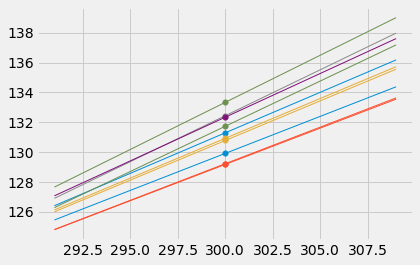

In [38]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

SLIDE: Confidence Interval for Prediction

## Confidence Interval for Prediction ##

In [39]:
def bootstrap_prediction(t, x, y, new_x, repetitions=1000):
    """ 
    Makes a 95% confidence interval for the prediction at new_x, using
    linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='gold', lw=8);
    print('Approximate 95%-confidence interval for height of true line:')
    print(np.round(left,2), np.round(right,2), 'width =', np.round(right - left,2), ')') 

Approximate 95%-confidence interval for height of true line:
128.99 132.8 width = 3.81 )


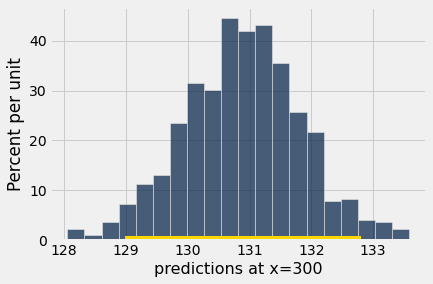

In [40]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

<h3> Predictions at Various Values of $x$</h3>

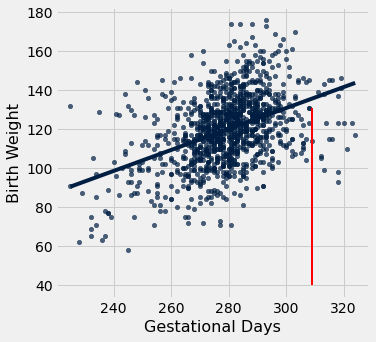

In [41]:
x = 309
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

<h4>So far, we've only made predictions at $x=300$.<br>  
    
Let's see how the confidence intervals look for $x$ values to the extremes&mdash;far left and far right. </h4>

<h4>Let's how the prediction for $x=210$ (near the extreme left) varies:</h4>

Approximate 95%-confidence interval for height of true line:
76.3 88.12 width = 11.81 )


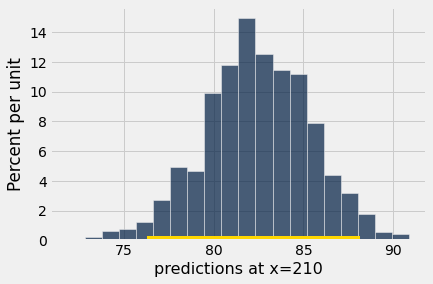

In [42]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 210)

<h4>Let's how the prediction for $x=280$ (closer to the center) varies:</h4>

Approximate 95%-confidence interval for height of true line:
119.18 121.02 width = 1.85 )


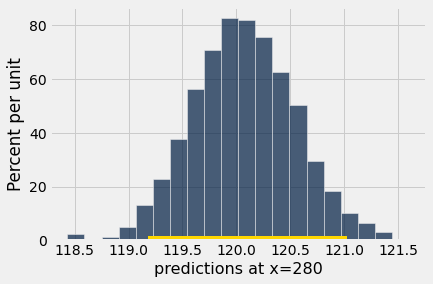

In [43]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

<h4>Let's how the prediction for $x=325$ (near the extreme right) varies:</h4>

Approximate 95%-confidence interval for height of true line:
140.4 148.22 width = 7.83 )


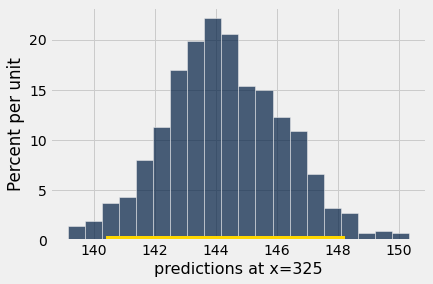

In [44]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 325)

<h4>Mean Gestational Days</h4>

In [45]:
mean_gestational_days = np.mean(births.column('Gestational Days'))
np.round(mean_gestational_days,2)

279.11

<h3>Reason for Tighter Confidence Intervals Near the Center?</h3>

<h4>Every regression line goes through the center $(\mu_x,\mu_y)$ of the data, where $\mu_x$ and $\mu_y$ denote the Mean (Average) of $x$ and Mean (Average) of $y$, respectively.<br>

It's true that for each resample the center $(\mu_x,\mu_y)$ varies. But given a large enough bootstrap sample size, that variability is small. </h4> 



In [46]:
## Questions?
## Slides

SLIDE: Predictions at Different Values of $x$